In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from geopy.geocoders import Nominatim
import re
data_location = "Properati.csv"
data , data_original = pd.read_csv(data_location, index_col= [0]) , pd.read_csv(data_location, index_col  =[0])
data.head()
data['description'] = data['description'].astype(str)

In [2]:
data

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...


In [3]:
data['place_with_parent_names'].unique().shape[0]

1164

In [4]:
#Definimos los patrones Regex
patron_m2 = '(\d{2,3})\,?\.?\d?\d?\s?([Mm]\.?\s?[2²]|metros)'
patron_amenities = r'([áa]reas? com[uú]ne?s?|amenities|[sz]um|gimnasio|solarium|sauna|g[iy]m|solarium)'
patron_portero = r'(porter[oa]s?|encargad[oa]s?|seren[oa]s?)'
patron_seguridad = r'(Seg\.?u?r?i?d?a?d? 24\s?ho?r?a?s|Prosegur|adt)'
patron_aptoprof = r'(Apto Prof\.?e?s?i?o?n?a?l?)'
patron_terraza = r'(terrazas?)'
patron_balcon = r'(balc[oó]ne?s?)'
patron_patio = r'(patios?|jard[ií]ne?s?|zonas? verdes?)'
patron_amb = r'((\d{1,2})\s?AMB)'
patron_dorm = r'((\d{1,2})\s?(hab|dorm|cuart))'
patron_disp = r'(frente|contrafrente|fondo|interno)'
patron_vista = r'(vista)'
patron_piso = r'((piso|planta)\:?\s? (\d{1,2})(\°|er|do|to|mo|vo|no|ro|ra|da|ta|ma|va|na|) |((\d{1,2})(\°|er|do|to|mo|vo|no|ro|ra|da|ta|ma|va|na|)\s?(piso|planta)|planta baja|primer piso|primera planta|segundo piso|segunda planta|tercer piso|tercera planta|cuarto piso|cuarta planta|quinto piso|quinta planta|sexto piso|sexta planta|s[ée]ptimo piso|s[ée]ptima planta|[úu]ltim[oa] (piso|planta)))'
patron_pozo = r'(pozo|construcci[oó]n|en obra)'
patron_baulera = r'(baulera|guardamuebles)'
patron_lavadero = r'(lavadero)'
patron_garage = r'(gara[jg]es?|cocheras?|estacionamientos?)'
patron_PH = r'(P\.?\s?H|Propi?e?d?a?d? hor)'
patron_precio = r'(U[S$][DS]?)\:?\s?((\d{5,8})\,?\d?\d?|(\d{2,3}\.\d{3})\,?\d?\d?|(\d{1,2}\.\d{3}\.\d{3})\,?\d?\d?)|((\d{5,8})\,?\d?\d?|(\d{2,3}\.\d{3})\,?\d?\d?|(\d{1,2}\.\d{3}\.\d{3})\,?\d?\d?)\s?(U[S$][DS]?|D[OÓ]LARES)'


121220 propiedades separadas en 26 campos. Averiguamos el tipo de campo

##columna de m2
m2_regex = re.compile(patron_m2)
data["m2_new"] = data["m2_new"].apply(lambda x: m2_regex.sub(cadena_reemplazo, x))

count    6220.000000
mean      251.969614
std       259.384289
min        22.000000
25%        68.000000
50%       127.000000
75%       346.250000
max       999.000000
Name: title, dtype: float64


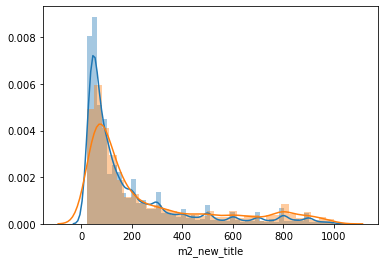

In [5]:

##columna de m2 entre 22 y 800m2 en Titulo
m2_regex = re.compile(patron_m2)
resultado_m2 = data['description'].apply(lambda x: m2_regex.search(x))
segresult_m2 = resultado_m2.apply(lambda x: np.NaN if x is None else x[1]).astype(float)
#segresult_m2[segresult_m2 > 800] = np.NaN
segresult_m2[segresult_m2 < 22] = np.NaN
data['m2_new'] = segresult_m2
#print(data['m2_new'].value_counts())
p=sns.distplot(data['m2_new'])
#print(segresult_m2.describe())
m2_regex = re.compile(patron_m2)
resultado_m2 = data['title'].apply(lambda x: m2_regex.search(x))
segresult_m2 = resultado_m2.apply(lambda x: np.NaN if x is None else x[1]).astype(float)
#segresult_m2[segresult_m2 > 800] = np.NaN
segresult_m2[segresult_m2 < 22] = np.NaN
data['m2_new_title'] = segresult_m2
#print(data['m2_new_title'].value_counts())
p=sns.distplot(data['m2_new_title'])
print(segresult_m2.describe())

##Ahora lo compilo en m2_new

mask_null_m2_final = data['m2_new'].isnull()
data.loc[mask_null_m2_final, 'm2_new'] = data.loc[mask_null_m2_final,'m2_new_title']


In [6]:
#v1

import pandas as pd

def StatsDescribe(df):
    
    '''StatsDescribe es una función que toma un DataFrame como argumento y crea un diccionario de DataFrames con información estadística relevante.
   La función devuelve las keys del diccionario creado, que son los nombres de las columnas del DataFrame argumento. Para acceder a la información estadística 
   de cada key se puede escribir: 
   
   df_stats_dict['key'] o usar df_stats_dict.get['key']             siendo 'key' alguna de las keys que retorna la función.'''
    
    dtypes_permitidos = ['float64','int64','datetime64']  # Tipo de datos permitidos para la funcion pandas.describe(). Podrían ser más.
    columnas = [i for i in df.columns if df.dtypes[i] in dtypes_permitidos] # De todos los nombres de las columnas me quedo con aquellos cuyo tipo de dato pertence a dtypes_permitidos.
    stats = [pd.DataFrame(round(df[columna].describe(),2)) for columna in columnas] #Estadística descriptiva de cada columna y conversión a DataFrame.
    global df_stats_dict #Declaro la variable df_stats_dict como global para poder invocarla fuera de la función.
    df_stats_dict = {columnas[i]:stats[i] for i in range(len(columnas))} #Creo diccionario con la información.
    print('HAY INFORMACIÓN ESTADÍSTICA SOBRE LAS SIGUIENTES COLUMNAS DEL DATAFRAME:')

    return df_stats_dict.keys()

StatsDescribe(data)



HAY INFORMACIÓN ESTADÍSTICA SOBRE LAS SIGUIENTES COLUMNAS DEL DATAFRAME:


dict_keys(['geonames_id', 'lat', 'lon', 'price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses', 'm2_new', 'm2_new_title'])

In [7]:
stats = data.describe() 
stats

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,m2_new,m2_new_title
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04,34690.000000,6220.000000
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03,195.796627,251.969614
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05,218.774709,259.384289
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00,22.000000,22.000000
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03,51.000000,68.000000
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03,100.000000,127.000000
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03,243.000000,346.250000
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07,999.000000,999.000000


In [8]:
##columna de amenities
amenities_regex = re.compile(patron_amenities, re.IGNORECASE)
resultado_amenities = data['description'].apply(lambda x: amenities_regex.search(x))
data['amenities'] = resultado_amenities.apply(lambda x: 0 if x is None else 1)
print(data['amenities'].value_counts())

0    94561
1    26659
Name: amenities, dtype: int64


In [9]:
##columna de portero
portero_regex = re.compile(patron_portero, re.IGNORECASE)
resultado_portero = data['description'].apply(lambda x: portero_regex.search(x))
data['portero'] = resultado_portero.apply(lambda x: 0 if x is None else 1)
print(data['portero'].value_counts())

0    117352
1      3868
Name: portero, dtype: int64


In [10]:
##columna de seguridad
seguridad_regex = re.compile(patron_seguridad, re.IGNORECASE)
resultado_seguridad = data['description'].apply(lambda x: seguridad_regex.search(x))
data['seguridad'] = resultado_seguridad.apply(lambda x: 0 if x is None else 1)
print(data['seguridad'].value_counts())

0    118389
1      2831
Name: seguridad, dtype: int64


In [11]:
##columna de Apto Profesional
aptoprof_regex = re.compile(patron_aptoprof, re.IGNORECASE)
resultado_aptoprof = data['description'].apply(lambda x: aptoprof_regex.search(x))
data['aptoprof'] = resultado_aptoprof.apply(lambda x: 0 if x is None else 1)
print(data['aptoprof'].value_counts())

0    116283
1      4937
Name: aptoprof, dtype: int64


In [12]:
##columna de terraza
terraza_regex = re.compile(patron_terraza, re.IGNORECASE)
resultado_terraza = data['description'].apply(lambda x: terraza_regex.search(x))
data['terraza'] = resultado_terraza.apply(lambda x: 0 if x is None else 1)
print(data['terraza'].value_counts())

0    93711
1    27509
Name: terraza, dtype: int64


In [13]:
##columna de balcon
balcon_regex = re.compile(patron_balcon, re.IGNORECASE)
resultado_balcon = data['description'].apply(lambda x: balcon_regex.search(x))
data['balcon'] = resultado_balcon.apply(lambda x: 0 if x is None else 1)
print(data['balcon'].value_counts())

0    78081
1    43139
Name: balcon, dtype: int64


In [14]:
##columna de patio
patio_regex = re.compile(patron_patio, re.IGNORECASE)
resultado_patio = data['description'].apply(lambda x: patio_regex.search(x))
data['patio'] = resultado_patio.apply(lambda x: 0 if x is None else 1)
print(data['patio'].value_counts())

0    86037
1    35183
Name: patio, dtype: int64


2.0     13020
3.0     12354
4.0      6816
1.0      2753
5.0      1896
6.0       556
7.0       226
8.0        39
9.0        21
0.0        19
10.0       14
11.0       13
72.0        8
50.0        6
23.0        5
53.0        5
14.0        5
12.0        5
42.0        4
24.0        4
33.0        4
73.0        4
93.0        3
15.0        3
22.0        3
18.0        3
62.0        3
26.0        3
28.0        3
83.0        3
13.0        2
25.0        2
49.0        2
90.0        2
21.0        2
17.0        2
36.0        2
54.0        1
44.0        1
47.0        1
52.0        1
32.0        1
97.0        1
65.0        1
61.0        1
27.0        1
20.0        1
84.0        1
64.0        1
16.0        1
92.0        1
71.0        1
81.0        1
74.0        1
51.0        1
76.0        1
46.0        1
Name: amb, dtype: int64


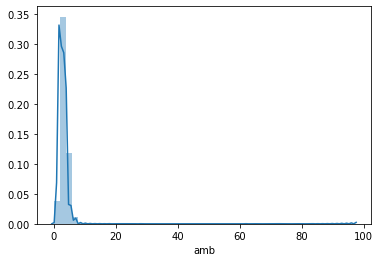

In [15]:
##columna de amb
amb_regex = re.compile(patron_amb, re.IGNORECASE)
resultado_amb = data['description'].apply(lambda x: amb_regex.search(x))
segresult_amb = resultado_amb.apply(lambda x: np.NaN if x is None else x[2]).astype(float)
#segresult_amb[segresult_amb > 12] = np.NaN
data['amb'] = segresult_amb
print(data['amb'].value_counts())
p=sns.distplot(data['amb'])

2.0     17451
3.0     13637
1.0      7945
4.0      3610
5.0       624
6.0       112
0.0        37
7.0        36
8.0        30
10.0       27
9.0        23
11.0       11
12.0        9
Name: dorm, dtype: int64


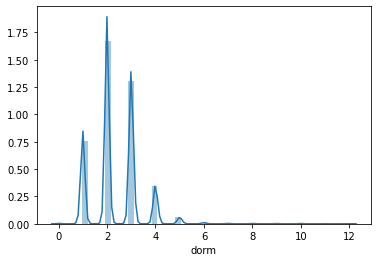

In [16]:
##columna de dorm
dorm_regex = re.compile(patron_dorm, re.IGNORECASE)
resultado_dorm = data['description'].apply(lambda x: dorm_regex.search(x))
segresult_dorm = resultado_dorm.apply(lambda x: np.NaN if x is None else x[2]).astype(float)
segresult_dorm[segresult_dorm > 12] = np.NaN
data['dorm'] = segresult_dorm
print(data['dorm'].value_counts())
p=sns.distplot(data['dorm'])

In [17]:
##columna de disp
disp_regex = re.compile(patron_disp, re.IGNORECASE)
resultado_disp = data['description'].apply(lambda x: disp_regex.search(x))
segresult_disp = resultado_disp.apply(lambda x: x if x is None else x[1])
segresult_disp.astype(str)
segresult_disp[segresult_disp.str.lower() == "frente"] = "0"
segresult_disp[segresult_disp.str.lower() == "fondo"] = "1"
segresult_disp[segresult_disp.str.lower() == "contrafrente"] = "1"
segresult_disp[segresult_disp.str.lower() == "interno"] = "1"
segresult_disp = segresult_disp.apply(lambda x: np.nan if x is None else x).astype(float)
data['disp'] = segresult_disp
print(data['disp'].value_counts())

0.0    32982
1.0    13743
Name: disp, dtype: int64


In [18]:
##columna de vista
vista_regex = re.compile(patron_vista, re.IGNORECASE)
resultado_vista = data['description'].apply(lambda x: vista_regex.search(x))
data['vista'] = resultado_vista.apply(lambda x: 0 if x is None else 1)
print(data['vista'].value_counts())

0    96828
1    24392
Name: vista, dtype: int64


In [19]:
##columna de piso
piso_regex = re.compile(patron_piso, re.IGNORECASE)
resultado_piso = data['description'].apply(lambda x: piso_regex.search(x))
data['piso'] = resultado_piso.apply(lambda x: x if x is None else x[0])
print(data['piso'].value_counts())

planta baja    8229
Planta Baja    3400
PLANTA BAJA    2802
2 planta       2464
Planta baja    1910
               ... 
PISO:  2          1
Piso: 9           1
24 Piso           1
piso 16°          1
25Planta          1
Name: piso, Length: 810, dtype: int64


In [20]:
## COlumna de piso, limpieza con diccionario
repl_dict = {re.compile('1°|01|1er|primer', re.IGNORECASE): '1',
             re.compile('baja', re.IGNORECASE): '0',
             re.compile('2°|2do|segund', re.IGNORECASE): '2',
             re.compile('3°|3er|tercer', re.IGNORECASE): '3',
             re.compile('4°|4to|cuart', re.IGNORECASE): '4',
             re.compile('5°|5to|quint', re.IGNORECASE): '5',
             re.compile('6°|6to|sext', re.IGNORECASE): '6',
             re.compile('7°|7mo|s[eé]ptim', re.IGNORECASE): '7',
             re.compile('8°|8vo|octav', re.IGNORECASE): '8',
             re.compile('9°|9no|noven', re.IGNORECASE): '9',
             re.compile('10°|10mo|diez', re.IGNORECASE): '10',
             re.compile('11°|11ro|once', re.IGNORECASE): '11',
             re.compile('12°|12do|doce', re.IGNORECASE): '12',
             re.compile('13°|13ro|trece', re.IGNORECASE): '13',
             re.compile('14°|14to|catorce', re.IGNORECASE): '14',
             re.compile('15°|15to|quince', re.IGNORECASE): '15',
             re.compile('16°|16to|dieciseis', re.IGNORECASE): '16',
             re.compile('17°|17mo|diecisiete', re.IGNORECASE): '17',
             re.compile('18°|18mo|dieciocho', re.IGNORECASE): '18',
             re.compile('19°|19no|diecinueve', re.IGNORECASE): '19',
             re.compile('20°|20[mv]o|veinte', re.IGNORECASE): '20'}
data['piso2'] = data['piso'].replace(repl_dict, regex=True)
print(data['piso2'].sample(n=20))

20399         None
98151       5 piso
46857         None
17114         None
30530         None
114769        None
118242        None
105099        None
57248       9 piso
5817          None
61465         None
97956     Planta 0
23838         None
25037         None
13889         None
86465         None
71937      2o piso
20140     PLANTA 0
58049         None
77653         None
Name: piso2, dtype: object


In [21]:
## COlumna de piso, limpieza con diccionario
repl_dict2 = {re.compile('\D', re.IGNORECASE): ''}
data['piso3'] = data['piso2'].replace(repl_dict2, regex=True)
print(data['piso3'])

0            0
1         None
2            3
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: piso3, Length: 121220, dtype: object


0         0.0
1         NaN
2         3.0
3         NaN
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218    NaN
121219    NaN
Name: piso3, Length: 121220, dtype: float64


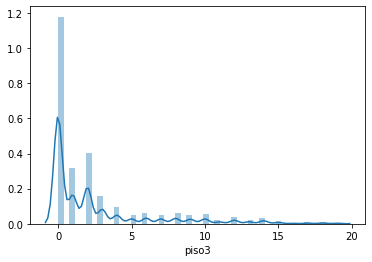

In [22]:
data['piso3'] = pd.to_numeric(data['piso3'], downcast='float')
data['piso3'] = data['piso3'].apply(lambda x: x if x < 20 else np.NaN)
print(data['piso3'])
p=sns.distplot(data['piso3'], kde=True)
#finalmente nos quedamos solo con la columna piso3, las otras fueron de trabajo

In [23]:
##columna de pozo
pozo_regex = re.compile(patron_pozo, re.IGNORECASE)
resultado_pozo = data['description'].apply(lambda x: pozo_regex.search(x))
data['pozo'] = resultado_pozo.apply(lambda x: 0 if x is None else 1)
print(data['pozo'].value_counts())

0    108193
1     13027
Name: pozo, dtype: int64


In [24]:
##columna de baulera
baulera_regex = re.compile(patron_baulera, re.IGNORECASE)
resultado_baulera = data['description'].apply(lambda x: baulera_regex.search(x))
data['baulera'] = resultado_baulera.apply(lambda x: 0 if x is None else 1)
print(data['baulera'].value_counts())

0    110425
1     10795
Name: baulera, dtype: int64


In [25]:
##columna de lavadero
lavadero_regex = re.compile(patron_lavadero, re.IGNORECASE)
resultado_lavadero = data['description'].apply(lambda x: lavadero_regex.search(x))
data['lavadero'] = resultado_lavadero.apply(lambda x: 0 if x is None else 1)
print(data['lavadero'].value_counts())

0    82891
1    38329
Name: lavadero, dtype: int64


In [26]:
##columna de garage
garage_regex = re.compile(patron_garage, re.IGNORECASE)
resultado_garage = data['description'].apply(lambda x: garage_regex.search(x))
data['garage'] = resultado_garage.apply(lambda x: 0 if x is None else 1)
print(data['garage'].value_counts())

0    67343
1    53877
Name: garage, dtype: int64


In [27]:
##columna de PH
PH_regex = re.compile(patron_PH, re.IGNORECASE)
resultado_PH = data['description'].apply(lambda x: PH_regex.search(x))
data['PH'] = resultado_PH.apply(lambda x: 0 if x is None else 1)
print(data['PH'].value_counts())

0    115207
1      6013
Name: PH, dtype: int64


In [28]:

##columna de precio en  description y titulo
precio_regex = re.compile(patron_precio, re.IGNORECASE)
resultado_precio = data['description'].apply(lambda x: precio_regex.search(x))
data['precio'] = resultado_precio.apply(lambda x: x if x is None else x[0])
print(data['precio'].value_counts())
precio_regex = re.compile(patron_precio, re.IGNORECASE)
resultado_precio = data['title'].apply(lambda x: precio_regex.search(x))
data['precio_titulo'] = resultado_precio.apply(lambda x: x if x is None else x[0])
print(data['precio_titulo'].value_counts())

##Ahora lo compilo en precio

mask_null_precio = data['precio'].isnull()
data.loc[mask_null_precio, 'precio'] = data.loc[mask_null_precio,'precio_titulo']

U$S 20.000     138
U$S 25.000     137
USD 120000     135
USD 130000     133
u$s20.000      114
              ... 
USD 14.520       1
u$s 395.000      1
48.000UsD        1
U$ 185.000       1
USD 133.800      1
Name: precio, Length: 2972, dtype: int64
U$D 120.000    72
U$D 110.000    60
U$D 85.000     54
U$S 220.000    53
U$D 250.000    53
               ..
U$S 281.650     1
U$S 23000       1
U$S 296.000     1
u$ 150.000      1
U$S 69.900      1
Name: precio_titulo, Length: 1384, dtype: int64


25000.0      362
20000.0      361
120000.0     358
130000.0     308
110000.0     297
            ... 
37150.0        1
3950000.0      1
297137.0       1
107030.0       1
327779.0       1
Name: precio3, Length: 1472, dtype: int64
count    1.764700e+04
mean     2.501470e+05
std      1.402568e+06
min      2.000000e+04
25%      7.500000e+04
50%      1.320000e+05
75%      2.600000e+05
max      1.500001e+08
Name: precio3, dtype: float64


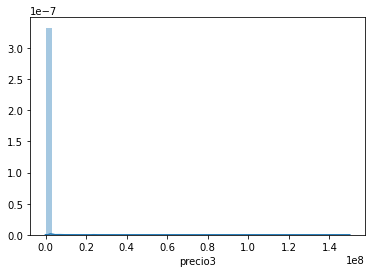

In [29]:
repl_dict3 = {re.compile('\,\d\d$|\.|\s', re.IGNORECASE): ''}
data['precio2'] = data['precio'].replace(repl_dict3, regex=True)
repl_dict4 = {re.compile('\D', re.IGNORECASE): ''}
data['precio3'] = data['precio2'].replace(repl_dict4, regex=True)
data['precio3'] = data['precio3'].astype(float)
#data['precio3'] = data['precio3'].apply(lambda x: np.NaN if x > 2000000 else x)
data['precio3'] = data['precio3'].apply(lambda x: np.NaN if x < 20000 else x)
print(data['precio3'].value_counts())
print(data['precio3'].describe())
p=sns.distplot(data['precio3'])

#Eliminadas las props de mas de 2 millones USD y menos de 20k USD

In [30]:
data.sample()
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'm2_new', 'm2_new_title',
       'amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'amb', 'dorm', 'disp', 'vista', 'piso', 'piso2', 'piso3',
       'pozo', 'baulera', 'lavadero', 'garage', 'PH', 'precio',
       'precio_titulo', 'precio2', 'precio3'],
      dtype='object')

In [31]:
#data.drop(["piso","piso2","precio","precio2"], axis=1).to_csv(r'Archivo_Ivan.csv')

In [32]:
mask_data_m2_null = data['surface_total_in_m2'].isnull()
print(mask_data_m2_null.value_counts())
mask_data_m2_null = data['surface_total_in_m2'].isnull()
data.loc[mask_data_m2_null,'m2_new'].isnull().value_counts()

False    81892
True     39328
Name: surface_total_in_m2, dtype: int64


True     30277
False     9051
Name: m2_new, dtype: int64

In [33]:
#creo nueva columna de m2_final que es 'surface_total_in_m2' con los null reemplazados por lo que encontro la regex
data['m2_final'] = data['surface_total_in_m2']
mask_null_m2_final = data['surface_total_in_m2'].isnull()
data.loc[mask_null_m2_final, 'm2_final'] = data.loc[mask_null_m2_final,'m2_new']
data["m2_final"][data["m2_final"] < 22] = np.NaN
data["m2_final"][data["m2_final"] > 1000] = np.NaN
#data['m2_final'].isnull().value_counts()

#data[['surface_total_in_m2','m2_final','m2_new']].sample(20)
data['m2_final'].describe()



C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    88270.000000
mean       158.069684
std        177.611400
min         22.000000
25%         50.000000
50%         84.000000
75%        198.000000
max       1000.000000
Name: m2_final, dtype: float64

In [34]:
#creo nueva columna de precio y reemplazo con valores encontradops por regex
data['precio_final'] = data['price_aprox_usd']
mask_null_precio_final = data['price_aprox_usd'].isnull()
data.loc[mask_null_precio_final, 'precio_final'] = data.loc[mask_null_precio_final,'precio3']
data['precio_final'][data['precio_final']<30000] = np.NaN
print(data['precio_final'].isnull().value_counts())
print(data['precio_final'].describe())
data[['price_aprox_usd','precio_final','precio3']].sample(20)

False    102772
True      18448
Name: precio_final, dtype: int64
count    1.027720e+05
mean     2.406380e+05
std      3.892712e+05
min      3.000000e+04
25%      9.000000e+04
50%      1.450000e+05
75%      2.670000e+05
max      4.654544e+07
Name: precio_final, dtype: float64


C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,price_aprox_usd,precio_final,precio3
65324,129000.00,129000.00,NaN
95614,110000.00,110000.00,NaN
73687,220000.00,220000.00,NaN
27501,55000.00,55000.00,NaN
38083,75000.00,75000.00,NaN
28368,840000.00,840000.00,840000.0
96982,270000.00,270000.00,NaN
108588,150000.00,150000.00,NaN
57394,83000.00,83000.00,NaN
60857,67861.24,67861.24,NaN


In [35]:
#me fijo donde estan los nulls en la columna orifinal 'floor'
#mask_null_piso_final = data['floor'].isnull()
#data.loc[mask_null_piso_final,'piso3'].isnull().value_counts()
#print(mask_null_piso_final.value_counts())
#data.loc[mask_null_piso_final,'piso3'].isnull().value_counts()

count    41955.000000
mean         2.642784
std          3.694350
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: piso_final, dtype: float64 AxesSubplot(0.125,0.125;0.775x0.755)


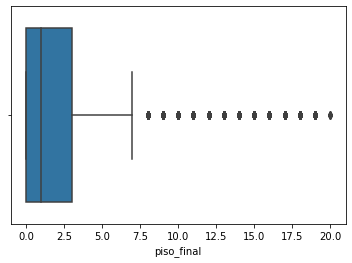

In [36]:
#Hago reemplazo de los nulls en floor por aquello valores encontrados en las regex
data['piso_final'] = data['floor']
mask_null_piso_final = data['floor'].isnull()
data.loc[mask_null_piso_final, 'piso_final'] = data.loc[mask_null_piso_final,'piso3']
#A los que tienen mas dde 20 pisos los consideramos error y los cambiamos por NaN
mask_piso_max = data['piso_final'] > 20
data.loc[mask_piso_max,'piso_final'] = np.NaN
#print(data['piso_final'].isnull().value_counts())
#data[['floor','piso_final','piso3']].sample(20)
print(data['piso_final'].describe(),sns.boxplot(data['piso_final']))

In [37]:
#me fijo donde estan los nulls en la columna orifinal 'rooms'
mask_null_amb_final = data['rooms'].isnull()
data.loc[mask_null_amb_final,'amb'].isnull().value_counts()
print('Los nulos en el orignal son:',mask_null_amb_final.sum())
data.loc[mask_null_amb_final,'amb'].isnull().value_counts()

Los nulos en el orignal son: 73830


True     54769
False    19061
Name: amb, dtype: int64

False    66117
True     55103
Name: amb_final, dtype: int64
count    66117.000000
mean         2.989579
std          1.469649
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: amb_final, dtype: float64 AxesSubplot(0.125,0.125;0.775x0.755)


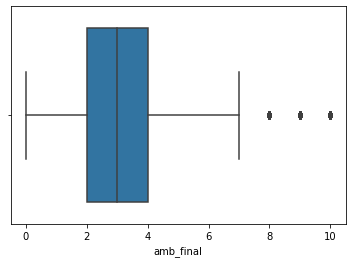

In [38]:
#Hago reemplazo
data['amb_final'] = data['rooms']
mask_null_amb_final = data['rooms'].isnull()
data.loc[mask_null_amb_final, 'amb_final'] = data.loc[mask_null_amb_final,'amb']
#A los que tienen mas dde 10 ambientes los consideramos error y los cambiamos por NaN
mask_piso_max = data['amb_final'] > 10
data.loc[mask_piso_max,'amb_final'] = np.NaN
print(data['amb_final'].isnull().value_counts())
#data[['rooms','amb_final','amb']].sample(20)
print(data['amb_final'].describe(),sns.boxplot(data['amb_final']))



In [39]:
#Recalculo de precio por metro cuadrado
mask_m2_final_not_null = data['m2_final'].notnull()
print(mask_m2_final_not_null.sum())


88270


count    90242.000000
mean      1926.315959
std       1031.789871
min        200.000000
25%       1245.000000
50%       1797.752809
75%       2433.333333
max       7000.000000
Name: precio_por_m2_final, dtype: float64 AxesSubplot(0.125,0.125;0.775x0.755)


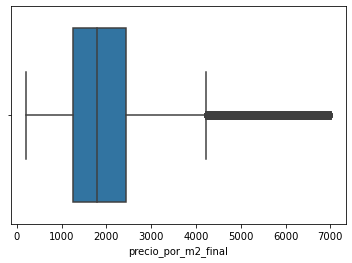

In [40]:
data['precio_por_m2_final'] = data['price_per_m2']
data.loc[mask_m2_final_not_null,'precio_por_m2_final'] = data.loc[mask_m2_final_not_null,'precio_final']/data.loc[mask_m2_final_not_null,'m2_final']
mask_condicion_precio_m2 = np.logical_or(data['precio_por_m2_final'] < 200 , data['precio_por_m2_final']>7000)
#reemplazo los que no cumplen la condicion por np.NaN
data.loc[mask_condicion_precio_m2,'precio_por_m2_final'] = np.NaN
print(data['precio_por_m2_final'].describe(),sns.boxplot(data['precio_por_m2_final']))


Sección para corregir los valores de la ubicación

In [41]:
#Primero elimino las barras al inicio y al final de los registros
import re

patron_1 = '^\|+'
patron_2 = '\|+$'
regex_1 = re.compile(patron_1)
regex_2= re.compile(patron_2)

place_with_parent_names_sin_barras_al_inicio = data['place_with_parent_names'].apply(lambda x: regex_1.sub('',x) )
place_with_parent_names_sin_barras_al_inicio_ni_al_final = place_with_parent_names_sin_barras_al_inicio.apply(lambda x :regex_2.sub('',x) )
place_with_parent_names_sin_barras_al_inicio_ni_al_final

place_with_parent_names_SERIE = place_with_parent_names_sin_barras_al_inicio_ni_al_final.apply(lambda x: x.split('|'))
print(place_with_parent_names_SERIE)

place_with_parent_names_SERIE.index

#Pais = place_with_parent_names_SERIE.apply(lambda x : x[i][0] for i in place_with_parent_names_SERIE.index)
type(place_with_parent_names_SERIE[0])


0                   [Argentina, Capital Federal, Mataderos]
1             [Argentina, Bs.As. G.B.A. Zona Sur, La Plata]
2                   [Argentina, Capital Federal, Mataderos]
3                     [Argentina, Capital Federal, Liniers]
4         [Argentina, Buenos Aires Costa Atlántica, Mar ...
                                ...                        
121215               [Argentina, Capital Federal, Belgrano]
121216    [Argentina, Bs.As. G.B.A. Zona Norte, San Isid...
121217          [Argentina, Capital Federal, Villa Urquiza]
121218    [Argentina, Buenos Aires Costa Atlántica, Mar ...
121219                         [Argentina, Capital Federal]
Name: place_with_parent_names, Length: 121220, dtype: object


list

In [42]:
#Creo una lista para despues pasarlo a un DataFrame
lista=list(place_with_parent_names_SERIE)
data_lugares = pd.DataFrame(lista,columns=['Pais','Provincia','Ciudad','Zona','Barrio'])
print(data_lugares)
print(data_lugares['Ciudad'].isnull().value_counts())



             Pais                     Provincia         Ciudad         Zona  \
0       Argentina               Capital Federal      Mataderos         None   
1       Argentina        Bs.As. G.B.A. Zona Sur       La Plata         None   
2       Argentina               Capital Federal      Mataderos         None   
3       Argentina               Capital Federal        Liniers         None   
4       Argentina  Buenos Aires Costa Atlántica  Mar del Plata       Centro   
...           ...                           ...            ...          ...   
121215  Argentina               Capital Federal       Belgrano         None   
121216  Argentina      Bs.As. G.B.A. Zona Norte     San Isidro       Beccar   
121217  Argentina               Capital Federal  Villa Urquiza         None   
121218  Argentina  Buenos Aires Costa Atlántica  Mar del Plata  Plaza Colón   
121219  Argentina               Capital Federal           None         None   

       Barrio  
0        None  
1        None  
2  

In [43]:
#De los null que hay en la columna ciudad, busco sus respectivos datos en la columna 'title'
print('Los registros nulls en la columna Ciudad son:',data_lugares['Ciudad'].isnull().sum())
#De esos nulls busco en la columna title si tengo alguna informacion
mask_null_ciudad = data_lugares['Ciudad'].isnull()
data.loc[mask_null_ciudad,'title'].value_counts()

Los registros nulls en la columna Ciudad son: 4780


Departamento - Nueva Cordoba                                                                       1001
Departamento en P.Chacabuco                                                                         237
Departamento en Nueva Cordoba                                                                        87
Departamento - Capital                                                                               70
CASA EN VENTA                                                                                        60
                                                                                                   ... 
Luminoso departamento en Parque Chacabuco  (Craig al 800)                                             1
Departamento 2 dormitorios en Venta a refaccionar en barrio Dálmine Nuevo, Campana. Oportunidad       1
Monoambiente divisible- B.Santa Rita                                                                  1
Casa 330m² con 2 Plantas en Moctezuma 2800, Argentina, Capital F

In [44]:
#localizo los indices de los titles que dicen Departamento - Nueva Cordoba o Departamento en Nueva Cordoba
mask_nueva_cordoba = np.logical_or(data['title'] == 'Departamento - Nueva Cordoba',data['title']=='Departamento en Nueva Cordoba')
#reemplazo en los null en 'Zona' por esos valores
data_lugares.loc[mask_nueva_cordoba,'Zona'] = 'Nueva Cordoba'

In [45]:
#localizo los indices de los titles que dicen Departamento en P.Chacabuco
mask_chacabuco = data['title'] == 'Departamento en P.Chacabuco'
data_lugares.loc[mask_chacabuco,'Ciudad'] = 'P.Chacabuco'
data_lugares[mask_chacabuco].head()

,Pais,Provincia,Ciudad,Zona,Barrio
68792,Argentina,Capital Federal,P.Chacabuco,None,None
68802,Argentina,Capital Federal,P.Chacabuco,None,None
68813,Argentina,Capital Federal,P.Chacabuco,None,None
68821,Argentina,Capital Federal,P.Chacabuco,None,None
68835,Argentina,Capital Federal,P.Chacabuco,None,None


In [46]:
#Reemplazo todos los nulls que quedan en 'Ciudad' por su respectivo valor de la columna 'Provincia'
mask_null_ciudad= data_lugares['Ciudad'].isnull()
print(mask_null_ciudad.sum())
data['Ciudad_final'] = data_lugares['Ciudad']
print('La cantidad inicial de nulos en la columna ciudad es:',data['Ciudad_final'].isnull().sum())

data_lugares['Ciudad_final'] = data_lugares['Ciudad']
mask_ciudad_null = data_lugares['Ciudad'].isnull()
data_lugares.loc[mask_ciudad_null,'Ciudad_final'] = data_lugares.loc[mask_ciudad_null,'Provincia']

data[['Pais','Provincia','Ciudad','Zona','Barrio']] = data_lugares[['Pais','Provincia','Ciudad_final','Zona','Barrio']]


data[['Pais','Provincia','Ciudad','Zona','Barrio']]

data['Ubicacion'] = data['Provincia'] + ' - ' + data['Ciudad']





4543
La cantidad inicial de nulos en la columna ciudad es: 4543


In [47]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'm2_new', 'm2_new_title',
       'amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'amb', 'dorm', 'disp', 'vista', 'piso', 'piso2', 'piso3',
       'pozo', 'baulera', 'lavadero', 'garage', 'PH', 'precio',
       'precio_titulo', 'precio2', 'precio3', 'm2_final', 'precio_final',
       'piso_final', 'amb_final', 'precio_por_m2_final', 'Ciudad_final',
       'Pais', 'Provincia', 'Ciudad', 'Zona', 'Barrio', 'Ubicacion'],
      dtype='object')

In [48]:
data.drop(['operation','place_name','country_name','geonames_id','lat','price','currency','price_aprox_local_currency','price_aprox_usd',
          'surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','floor','rooms','properati_url','image_thumbnail',
         'm2_new','piso','piso2','m2_new_title','piso3','precio','precio_titulo','precio2','precio3','state_name','PH','amb','lon','Ciudad_final','Pais','Provincia','Ciudad','Zona','Barrio','place_with_parent_names'],axis=1,inplace=True)

data.rename(columns={ 'property_type': 'Tipo_Propiedad',
                    'expenses': 'Expensas',
                    'm2_final': 'Total_M2',
                    'precio_final': 'Precio_USD',
                    'piso_final': 'Nro_Piso',
                    'amb_final': 'Nro_Ambientes',
                    'precio_por_m2_final': 'Precio_M2',
                    'title':'Titulo',                     
                    }, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Tipo_Propiedad  121220 non-null  object 
 1   lat-lon         69670 non-null   object 
 2   Expensas        14262 non-null   float64
 3   description     121220 non-null  object 
 4   Titulo          121220 non-null  object 
 5   amenities       121220 non-null  int64  
 6   portero         121220 non-null  int64  
 7   seguridad       121220 non-null  int64  
 8   aptoprof        121220 non-null  int64  
 9   terraza         121220 non-null  int64  
 10  balcon          121220 non-null  int64  
 11  patio           121220 non-null  int64  
 12  dorm            43552 non-null   float64
 13  disp            46725 non-null   float64
 14  vista           121220 non-null  int64  
 15  pozo            121220 non-null  int64  
 16  baulera         121220 non-null  int64  
 17  lavadero  

In [49]:
#Tiro indices que tienen NaN
mask = data['Total_M2'].isnull()
indices_borrar = mask[mask].index
data.drop(labels = indices_borrar , inplace = True)
print('la cantidad de filas despues de borrar datos con NaN debido a Total_M2 es:', data.shape[0])
mask = data['Precio_M2'].isnull()
indices_borrar = mask[mask].index
data.drop(labels = indices_borrar , inplace = True)
print('la cantidad de filas despues de borrar datos con NaN debido a Precio_M2 es:', data.shape[0])




data.reset_index(drop=True,inplace=True)

la cantidad de filas despues de borrar datos con NaN debido a Total_M2 es: 88270
la cantidad de filas despues de borrar datos con NaN debido a Precio_M2 es: 73521


In [50]:
#borro todos dato que no tenga como minimo 3 registros agrupados por tipo de propiedad y ubicacion
data['tipoYubicacion'] = data['Tipo_Propiedad'] + data['Ubicacion']
mask_unicos = data['tipoYubicacion'].value_counts()< 3
registros_unicos = list(data['tipoYubicacion'].value_counts()[mask_unicos].index)
data['a_borrar'] = data['tipoYubicacion'].apply(lambda x : x if x not in registros_unicos else 'borrar')
print('filas a borrar:',(data['a_borrar']=='borrar').value_counts()[1])

filas a borrar: 394


In [51]:
borrar_indices = data['a_borrar'][data['a_borrar']=='borrar'].index
data.drop(labels = borrar_indices , inplace = True)
data.reset_index(drop=True,inplace=True)
print('numero de filas despues de borrar datos unicos:',data.shape[0])
data.drop(['a_borrar'],axis = 1 , inplace = True)


numero de filas despues de borrar datos unicos: 73127


In [52]:
#Agrupo datos por Tipo de propiedad y ubicacion para luego limpiar outliers 
grouped_stats = data.groupby(['Tipo_Propiedad','Ubicacion']).describe()

In [53]:
grouped_stats.index

MultiIndex([(   'PH', 'Bs.As. G.B.A. Zona Norte - Bs.As. G.B.A. Zona Norte'),
            (   'PH',                  'Bs.As. G.B.A. Zona Norte - Escobar'),
            (   'PH',       'Bs.As. G.B.A. Zona Norte - General San Martín'),
            (   'PH',      'Bs.As. G.B.A. Zona Norte - Malvinas Argentinas'),
            (   'PH',             'Bs.As. G.B.A. Zona Norte - San Fernando'),
            (   'PH',               'Bs.As. G.B.A. Zona Norte - San Isidro'),
            (   'PH',               'Bs.As. G.B.A. Zona Norte - San Miguel'),
            (   'PH',                    'Bs.As. G.B.A. Zona Norte - Tigre'),
            (   'PH',            'Bs.As. G.B.A. Zona Norte - Vicente López'),
            (   'PH',               'Bs.As. G.B.A. Zona Oeste - Hurlingham'),
            ...
            ('store',                                   'Córdoba - Punilla'),
            ('store',                          'Córdoba - Villa Carlos Paz'),
            ('store',                    'Córdob

In [54]:
def no_outliers(data,to_clean):
    global data_clean
    for col in to_clean:
        multi_ind = grouped_stats[col].index
        for i in multi_ind:
            q1 = grouped_stats[col].loc[i]['25%']
            q3 = grouped_stats[col].loc[i]['75%']
            iqr = q3-q1
            sup = q3 + 1.5 * iqr #a partir de sup el dato es outlier 
            inf = q1 - 1.5 * iqr #por debajo de inf el dato es outlier 
            
            mask = data['tipoYubicacion'] == i[0] + i[1]
            indices_mask = data['tipoYubicacion'][mask].index
            temp = data.loc[indices_mask, col] #creo un dataframe temporal con la info solo de los indices
            temp = temp.apply(lambda x : x  if x > inf and  x < sup else np.nan) #le aplico el filtro de outliers
            #reemplazo nuevamente por nuevos valores sin outliers
            data.loc[indices_mask,col] = temp.loc[indices_mask]
          

    data_clean = data
    return round(data_clean.describe(),2)

In [55]:
no_outliers(data,['Expensas','Total_M2', 'Precio_USD', 'Precio_M2'])

,Expensas,amenities,portero,seguridad,aptoprof,terraza,balcon,patio,dorm,disp,vista,pozo,baulera,lavadero,garage,Total_M2,Precio_USD,Nro_Piso,Nro_Ambientes,Precio_M2
count,10212.00,73127.00,73127.00,73127.00,73127.00,73127.00,73127.00,73127.00,24698.0,29861.00,73127.00,73127.00,73127.00,73127.00,73127.00,68841.00,68449.00,26675.00,42853.00,70156.00
mean,2906.95,0.25,0.04,0.03,0.05,0.25,0.39,0.29,2.4,0.30,0.22,0.11,0.11,0.34,0.46,142.56,193565.20,2.77,2.89,1855.75
std,15784.34,0.43,0.19,0.17,0.22,0.43,0.49,0.46,1.0,0.46,0.41,0.32,0.31,0.47,0.50,158.05,160749.76,3.84,1.35,934.14
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22.00,30000.00,0.00,0.00,200.00
25%,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0,0.00,0.00,0.00,0.00,0.00,0.00,50.00,90000.00,0.00,2.00,1226.38
50%,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.0,0.00,0.00,0.00,0.00,0.00,0.00,78.00,140000.00,1.00,3.00,1775.00
75%,3600.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,3.0,1.00,0.00,0.00,0.00,1.00,1.00,175.00,241800.00,4.00,4.00,2388.75
max,1200000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,12.0,1.00,1.00,1.00,1.00,1.00,1.00,1000.00,3600000.00,20.00,10.00,6976.74


In [56]:
#Tiro datos  que tienen NaN en 'Total_M2' ,  'Precio_M2' y 'Precio_USD'
mask = data_clean['Total_M2'].isnull()
indices_borrar = mask[mask].index
data_clean.drop(labels = indices_borrar , inplace = True)
print('la cantidad de filas despues de borrar datos con NaN debido a los outliers en Total_M2 es:', data_clean.shape[0])
mask = data_clean['Precio_M2'].isnull()
indices_borrar = mask[mask].index
data_clean.drop(labels = indices_borrar , inplace = True)
print('la cantidad de filas despues de borrar datos con NaN debido a los outliers en Precio_M2 es:', data_clean.shape[0])
#mask = data_clean['Precio_USD'].isnull()
#indices_borrar = mask[mask].index
#data_clean.drop(labels = indices_borrar , inplace = True)
#print('la cantidad de filas despues de borrar datos con NaN debido a los outliers en Precio_USD es:', data_clean.shape[0])



data.reset_index(drop=True,inplace=True)

la cantidad de filas despues de borrar datos con NaN debido a los outliers en Total_M2 es: 68841
la cantidad de filas despues de borrar datos con NaN debido a los outliers en Precio_M2 es: 66463


In [57]:
#suponemos que los numeros de piso que no tienen datos es 0
mask = data_clean['Nro_Piso'].isnull()
data_clean.loc[mask,'Nro_Piso'] = 0


In [58]:
#print(data[['Ciudad','Precio_M2','Total_M2','Precio_USD']][data['Precio_M2']>6000])

In [59]:
#data.to_csv(r'Archivo_OK.csv')

In [60]:
data_clean.columns

Index(['Tipo_Propiedad', 'lat-lon', 'Expensas', 'description', 'Titulo',
       'amenities', 'portero', 'seguridad', 'aptoprof', 'terraza', 'balcon',
       'patio', 'dorm', 'disp', 'vista', 'pozo', 'baulera', 'lavadero',
       'garage', 'Total_M2', 'Precio_USD', 'Nro_Piso', 'Nro_Ambientes',
       'Precio_M2', 'Ubicacion', 'tipoYubicacion'],
      dtype='object')

In [61]:
data_clean.to_csv('TP2_dataset.csv',index = False)

LassoCV
r2: 0.640627099542078
MAE: 423.9447291804163
MSE: 310635.8349600113
RMSE: 557.3471404430198
R2: 0.6388114034921366


<AxesSubplot:ylabel='Precio_M2'>

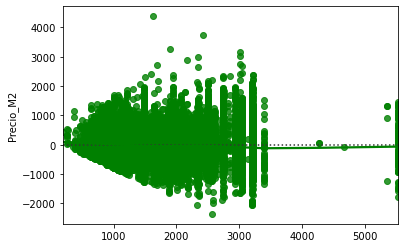

In [62]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


lm_lassocv = linear_model.LassoCV(normalize = True, cv = 8)
x=pd.get_dummies(data_clean[['Ubicacion','Tipo_Propiedad']],drop_first=True)
y=data_clean['Precio_M2']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
model  = lm_lassocv.fit(xtrain,ytrain)
ypred = lm_lassocv.predict(xtest)
print('LassoCV')
print('r2:',lm_lassocv.score(xtrain,ytrain))


print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))
sns.residplot(x=ypred, y=ytest, lowess=True, color="g")

In [63]:
lm_ridgecv = linear_model.RidgeCV(normalize = True, cv = 8 , scoring = 'r2')
x=pd.get_dummies(data_clean[['Ubicacion']],drop_first=True)
y=data_clean['Precio_M2']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)

lm_ridgecv.fit(xtrain,ytrain)
print('RidgeCV')
print('r2:',lm_ridgecv.score(xtrain,ytrain))




RidgeCV
r2: 0.507716006403246


In [64]:
elastic = linear_model.ElasticNet(alpha=0.000001 , normalize=True)
x=pd.get_dummies(data_clean[['Ubicacion']],drop_first=True)
y=data_clean['Precio_M2']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)

elastic.fit(xtrain,ytrain)
print('ElasticNet')
print('r2:',elastic.score(xtrain,ytrain))

ElasticNet
r2: 0.5116096873953184


In [65]:
lr = linear_model.LinearRegression()
x=pd.get_dummies(data_clean[['Ubicacion']],drop_first=True)
y=data_clean['Precio_M2']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)

lr.fit(xtrain,ytrain)
print('Linear Regression')
print('r2:',lr.score(xtrain,ytrain))

Linear Regression
r2: 0.5126675090840396


<AxesSubplot:xlabel='Precio_M2'>

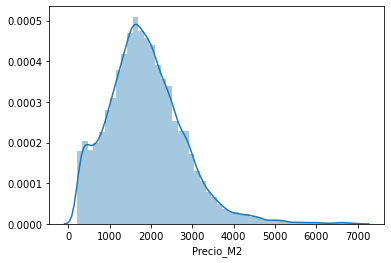

In [66]:
sns.distplot(data_clean['Precio_M2'])

<AxesSubplot:xlabel='Precio_USD'>

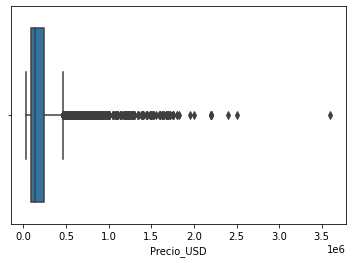

In [67]:
sns.boxplot(data_clean['Precio_USD'])

C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


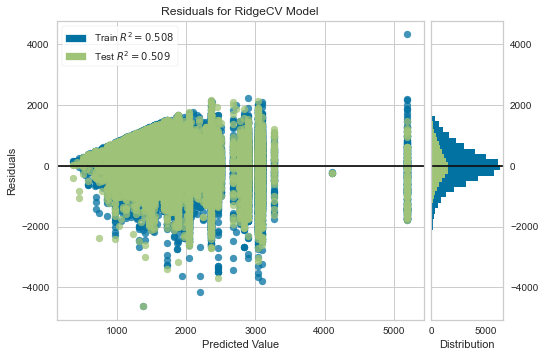

<AxesSubplot:title={'center':'Residuals for RidgeCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import RidgeCV


model = RidgeCV(normalize = True, cv = 8)
visualizer = ResidualsPlot(model)

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.show()



In [69]:
pd.get_dummies(data_clean[['Ubicacion','Tipo_Propiedad']],drop_first=True)

,Ubicacion_Bs.As. G.B.A. Zona Norte - Escobar,Ubicacion_Bs.As. G.B.A. Zona Norte - General San Martín,Ubicacion_Bs.As. G.B.A. Zona Norte - José C Paz,Ubicacion_Bs.As. G.B.A. Zona Norte - Malvinas Argentinas,Ubicacion_Bs.As. G.B.A. Zona Norte - Pilar,Ubicacion_Bs.As. G.B.A. Zona Norte - San Fernando,Ubicacion_Bs.As. G.B.A. Zona Norte - San Isidro,Ubicacion_Bs.As. G.B.A. Zona Norte - San Miguel,Ubicacion_Bs.As. G.B.A. Zona Norte - Tigre,Ubicacion_Bs.As. G.B.A. Zona Norte - Vicente López,...,Ubicacion_Tierra Del Fuego - Río Grande,Ubicacion_Tierra Del Fuego - Tierra Del Fuego,Ubicacion_Tierra Del Fuego - Ushuaia,Ubicacion_Tucumán - San Miguel de Tucumán,Ubicacion_Tucumán - Tafí del Valle,Ubicacion_Tucumán - Tucumán,Ubicacion_Tucumán - Yerba Buena,Tipo_Propiedad_apartment,Tipo_Propiedad_house,Tipo_Propiedad_store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
66459,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
66461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
pd.concat([pd.get_dummies(data_clean[['Ubicacion','Tipo_Propiedad']],drop_first=True),data_clean[['Total_M2']]],axis = 1 )

,Ubicacion_Bs.As. G.B.A. Zona Norte - Escobar,Ubicacion_Bs.As. G.B.A. Zona Norte - General San Martín,Ubicacion_Bs.As. G.B.A. Zona Norte - José C Paz,Ubicacion_Bs.As. G.B.A. Zona Norte - Malvinas Argentinas,Ubicacion_Bs.As. G.B.A. Zona Norte - Pilar,Ubicacion_Bs.As. G.B.A. Zona Norte - San Fernando,Ubicacion_Bs.As. G.B.A. Zona Norte - San Isidro,Ubicacion_Bs.As. G.B.A. Zona Norte - San Miguel,Ubicacion_Bs.As. G.B.A. Zona Norte - Tigre,Ubicacion_Bs.As. G.B.A. Zona Norte - Vicente López,...,Ubicacion_Tierra Del Fuego - Tierra Del Fuego,Ubicacion_Tierra Del Fuego - Ushuaia,Ubicacion_Tucumán - San Miguel de Tucumán,Ubicacion_Tucumán - Tafí del Valle,Ubicacion_Tucumán - Tucumán,Ubicacion_Tucumán - Yerba Buena,Tipo_Propiedad_apartment,Tipo_Propiedad_house,Tipo_Propiedad_store,Total_M2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,55.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,35.0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,106.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,157.0
66459,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,360.0
66460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,46.0
66461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,48.0
